<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/perceptron_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perceptron - PLR - IRIS classification problem

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [51]:
class Perceptron(object):

  def __init__(self, no_of_inputs, epochs=100, learning_rate=0.01):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = np.random.rand(no_of_inputs + 1)
        #self.weights = np.zeros(no_of_inputs + 1)
        self.training_error = []
        self.validation_error = []
  
  def predict(self, inputs):
    net = np.dot(inputs, self.weights[1:])+self.weights[0] 
    # step activation function
    if net >= 0:
      activation = 1
    else:
      activation = 0
    return activation
   
  def predict_(self, inputs):
    outputs = []
    for input in inputs:
      net = np.dot(input, self.weights[1:])+self.weights[0]
      if net >= 0:
        activation = 1
      else:
        activation = 0
      outputs.append(activation)
    return outputs
       
  def train(self, training_inputs, training_labels, validation_inputs, validation_labels):
    for _ in range(self.epochs):
      train_error = 0
      for inputs, label in zip(training_inputs, training_labels):
        prediction = self.predict(inputs)
        self.weights[1:] += self.learning_rate * (label - prediction) * inputs
        self.weights[0] += self.learning_rate * (label - prediction)
        train_error += (label - prediction)**2
      self.training_error.append(train_error.mean())
      val_error = 0
      for inputs, label in zip(validation_inputs, validation_labels):
        prediction = self.predict(inputs)
        val_error += (label - prediction)**2
      self.validation_error.append(val_error.mean())  

In [4]:
# test perceptron with IRIS data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
print(df.tail())

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


In [38]:
# extract first 100 class labels (50 iris-setosa and 50 iris-versicolor)
# Attribute Information: sepal length, sepal width, petal length, petal width in cm and class (Iris Setosa, Iris Versicolour, and Iris Virginica)
x = df.iloc[0:100, [2, 3]].values
y = df.iloc[0:100,4].values
y =np.where(y=='Iris-setosa',1, 0)
print(y)
print(x.ndim)
print(x.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=42, stratify=y_train)
# divided data into training, validation and testing 
print(y_test)
print(y_train)
print(np.bincount(y_train))
print(np.bincount(y_test))
print(np.bincount(y_val))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2
(100, 2)
[1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1]
[1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1
 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1]
[32 32]
[10 10]
[8 8]


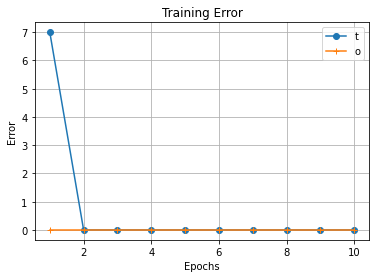

[ 0.44242201 -0.12193888 -0.11520144]


In [52]:
# use a peceptron to find a decsion boundary to separate the two classe
p = Perceptron(no_of_inputs=2, epochs=10, learning_rate=0.1)
p.train(x_train, y_train, x_val, y_val)

plt.plot(range(1,len(p.training_error)+1), p.training_error, marker='o', label='Training Error')
plt.plot(range(1,len(p.validation_error)+1), p.validation_error, marker='+', label='Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training Error')
plt.legend('top right')
plt.grid()
plt.show()

print(p.weights)    #w[0]=bias w[1:]=weights
pred = []
for t in x:
  pred.append(p.predict(t))

In [8]:
# plot decicion line
x1_min, x1_max = x[:,0].min()-1, x[:,0].max()+1
xx1 = np.arange(x1_min, x1_max, 0.1)
xx2 = -p.weights[1]/p.weights[2] * xx1 - p.weights[0]/p.weights[2]

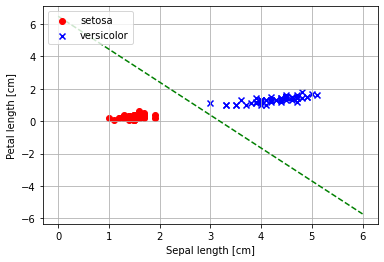

In [40]:
# scatter plot
plt.scatter(x[0:50,0], x[0:50,1], color='red', marker='o', label='setosa')
plt.scatter(x[50:100,0], x[50:100,1], color='blue', marker='x', label='versicolor')
plt.plot(xx1, xx2, 'g--')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [53]:
#print(pred==1)
pred = p.predict(x_test[0])
print(pred)

print(x_test[0:5,:])

pred = p.predict_(x_test)
print(pred)

error = sum(y_test - pred)/len(y_test)*100
print('Error = %2.2f %%'  %error)
# print out training error, validation error, and testing error

1
[[1.5 0.2]
 [1.5 0.2]
 [1.1 0.1]
 [1.4 0.2]
 [3.3 1. ]]
[1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1]
Error = 0.00 %
